# Esercizio 02.1
L'esercizio richiede di calcolare l'integrale $$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$ con metodi Monte-Carlo attraverso due tecniche di campionamento: campionamento uniforme e importance sampling. In generale posso calcolare con metodi Monte-Carlo un integrale della forma $$
I = \int_{\Omega} g(x) p(x)\, dx \quad \text{con} \quad p(x) \geq 0 \; \forall x \in \Omega, \quad \int_{\Omega} p(x)\, dx = 1
$$
attraverso la somma $$
G_N = \frac{1}{N} \sum_{i=1}^{N} g(x_i) \quad \text{con} \quad x_i \text{ campionato da } p(x)
$$

## 1. Campionamento uniforme
In questo caso $p(x)$ è $$
p(x) = 
\begin{cases}
1 & \text{se } 0 \le x \le 1 \\
0 & \text{altrimenti}
\end{cases}
$$
mentre $g(x)$ è semplicemente la funzione integranda $$g(x)= \frac{\pi}{2}\cos(\pi x/2) $$
Ho effettuato $10^4$ Monte-Carlo steps divisi in $100$ blocchi e ho calcolato l'incertezza con il data blocking.

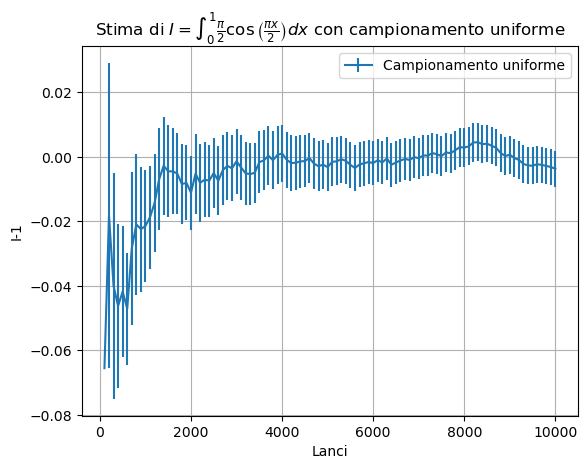

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#carico i dati
f1, x1, err1 = np.loadtxt("intmedia.txt", delimiter=' ', unpack=True)
#creo il grafico
plt.figure()
plt.errorbar(x1,f1-1,yerr=err1, label='Campionamento uniforme')
plt.title(r'Stima di $I = \int_0^1 \frac{\pi}{2} \cos\left(\frac{\pi x}{2}\right) dx $ con campionamento uniforme')
plt.xlabel('Lanci')
plt.ylabel('I-1')
plt.legend()
plt.grid(True)
plt.show()

## 2. Importance sampling
In questo caso $p(x)$ è $$p(x)=-2(x-1)$$ mentre $g(x)$ è $$g(x)=
\frac{\frac{\pi}{2} \cos\left(\frac{\pi x}{2}\right)}{-2(x - 1)}
$$
Ho effettuato $10^4$ Monte-Carlo steps divisi in $100$ blocchi e ho calcolato l'incertezza con il data blocking.
Per estrarre variabili casualmente secondo la distribuzione $p(x)$ ho usato il metodo dell'inversa della funzione cumulativa.

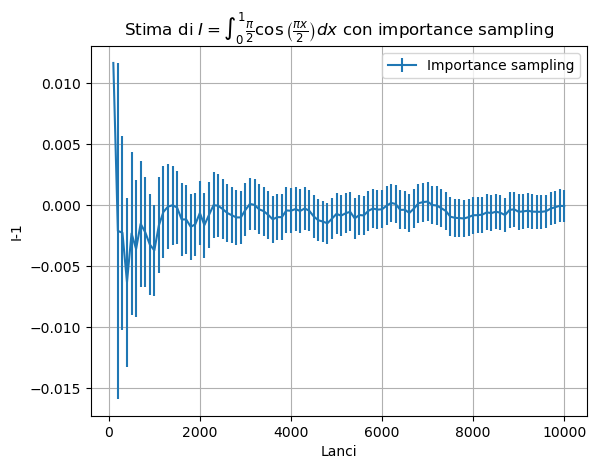

In [3]:
import matplotlib.pyplot as plt
import numpy as np

#carico i dati
f2, x2, err2 = np.loadtxt("intsampling.txt", delimiter=' ', unpack=True)
#creo il grafico
plt.figure()
plt.errorbar(x2,f2-1,yerr=err2, label='Importance sampling')
plt.title(r'Stima di $I = \int_0^1 \frac{\pi}{2} \cos\left(\frac{\pi x}{2}\right) dx $ con importance sampling')
plt.xlabel('Lanci')
plt.ylabel('I-1')
plt.legend()
plt.grid(True)
plt.show()

### 📈 Confronto tra grafici e conclusioni
E' evidente dai grafici che l'importance sampling riduce l'incertezza e le oscillazioni, avvicinandosi al valore reale dell'integrale in un numero minore di lanci rispetto al campionamento uniforme. L'importance sampling è sostanzialmente un campionamento intelligente delle $x_i$; scegliendo una $p(x)$ buona, l'incertezza si riduce e la stima migliore. Tecnicamente la miglior $p(x)$ è l'integranda stessa opportunamente normalizzata, ma la normalizzazione stessa richiede la conoscenza del valore dell'integrale e la valutazione dell'integrale stesso si riducerebbe alla banale somma $$G_N = \frac{1}{N} \sum_{i=1}^{N} I$$
Il trucco per migliorare la stima e abbassare l'errore è utilizzare una $p(x)$ con integrale noto e il più somigliante possibile all'integranda di partenza. In questo caso ho scelto la $p(x)$ espandendo secondo taylor la funzione coseno.

# Esercizio 02.2
L'esercizio richiede di simulare un random walk in 3D in due spazi diversi: in un reticolo cubico di lato $a=1$ con passi discreti di lunghezza $a$ lungo una delle tre direzioni spaziali e nel continuo con passi discreti di lunghezza $a$ lungo una direzione qualsiasi. Ho effettuato $100$ blocchi ciascuno di $10^4$ simulazioni di un cammino di $100$ passi. L'incertezza sul valore di $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ al passo iesimo è ottenuta con il data blocking.

## Reticolo cubico 

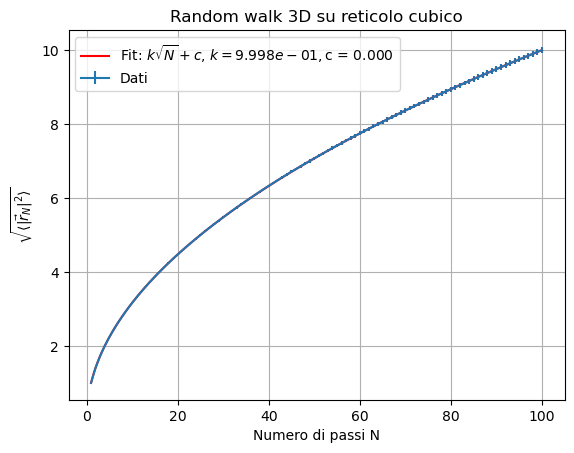

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#definisco la funzione da fittare f(x)=k*(radice di N)+c
def funzione_fit(x, k, c):
    return (k * np.sqrt(x))+c

#carico i dati dal file
x1, f1, err1 = np.loadtxt("randomdiscretewalk.txt", delimiter=' ', unpack=True)
#faccio il fit della funzione sui dati del file
popt,_ = curve_fit(funzione_fit, x1, f1)# l'underscore serve a python per ignorare la covarianza, cioè il calcolo dell'errore sul fit, che a me in questo caso non interessa
k, c = popt #setto i parametri della funzione con quelli del fit effettuato

x_fit = np.linspace(min(x1), max(x1), 1000) #numero e valore dei punti su cui eseguire il fit
y_fit = funzione_fit(x_fit, k, c) #fit della funzione
#creo il rafico
plt.figure()
plt.errorbar(x1,f1,yerr=err1, label='Dati')
#errorbar traccia i punti (x,y) con barre di errore yerr. label è l'etichetto per la legenda
plt.plot(x_fit, y_fit, label=rf'Fit: $k\sqrt{{N}} + c$, $k = {k:.3e}, $c = {c:.3f} ', color='red') #la notazione {k:.3e} mostra k in notazione scientifica con 3 cifre decimali, la notazione {c:.3f} mostra c con 3 cifre decimali. $ mostra la scritta in corsivo
#r serve per scrivere il testo in Latex
plt.xlabel('Numero di passi N')
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle}$')
plt.title('Random walk 3D su reticolo cubico')
plt.legend()
plt.grid(True)
plt.show()

## Random walk nel continuo

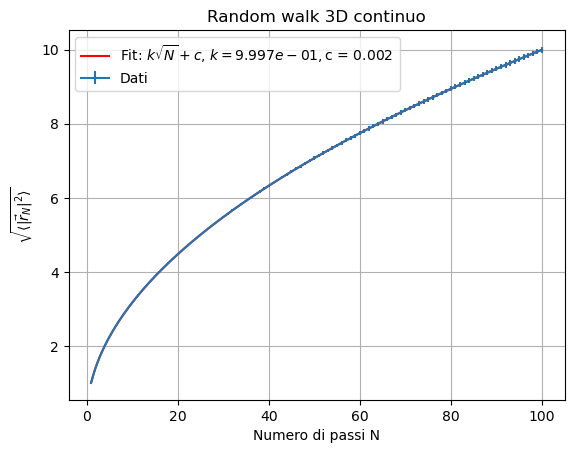

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#stessi procedimenti dello script con i dati di randomdiscretewalk.txt
def funzione_fit(x, k, c):
    return (k * np.sqrt(x))+c

x2, f2, err2 = np.loadtxt("randomcontinuumwalk.txt", delimiter=' ', unpack=True)

popt, _ = curve_fit(funzione_fit, x2, f2)
k, c = popt

x_fit = np.linspace(min(x2), max(x2), 1000) 
y_fit = funzione_fit(x_fit, k, c) 
plt.figure()
plt.errorbar(x2,f2,yerr=err2, label='Dati')
plt.plot(x_fit, y_fit, label=rf'Fit: $k\sqrt{{N}} + c$, $k = {k:.3e}, $c = {c:.3f} ', color='red')
plt.xlabel('Numero di passi N')
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle}$')
plt.title('Random walk 3D continuo')
plt.legend()
plt.grid(True)

plt.show()


### 🔍 Confronto e analisi
Sebbene dai grafici sia impercettibile, si nota come all'aumentare del numero di passi cresce l'incertezza sul valore di $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ a causa della maggior dispersione tra i blocchi della simulazione: random walks più lunghi avranno posizioni finali che differiranno maggiormente. Ho fittato entrambi i random walks con una funzione del tipo $f(N)=k\sqrt{N}+c$ mostrando un perfetto accordo tra la funzione e i grafici. Ciò conferma l'andamento tipico di processi diffusivi: $$
\sqrt{\langle r_N^2 \rangle} \propto \sqrt{N}
$$  
I valori di $k$ e $c$ della funzione fittata sono mostrati nella legenda dei grafici.